In [1]:
import h5py
import numpy as np
with h5py.File('../Input/images_training.h5','r') as H:
    data = np.copy(H['data'])
    X_train = data.reshape(len(data), -1)
with h5py.File('../Input/labels_training.h5','r') as H:
    label = np.copy(H['label'])
    y_train =label.reshape(len(label), -1)

In [8]:
with h5py.File('../Output/predicted_labels_LR.h5','r') as H:
    y2 = np.copy(H['label'])

In [9]:
sum(y2[:2000] ==  real_label)/2000

0.8255

In [4]:
with h5py.File('../Input/images_testing.h5','r') as H:
    real_test = np.copy(H['data'])
    X_test = real_test.reshape(len(real_test), -1)[:2000,:]
with h5py.File('../Input/labels_testing_2000.h5','r') as H:
    real_label = np.copy(H['label'])
    y_test =real_label.reshape(len(real_label), -1)

In [3]:
%run preprocessing.py
%run PCA

In [4]:
standard = StandardScaler()
standard.fit(X_train)

In [5]:
X_transform = standard.transform(X_train)
X_test_transform = standard.transform(X_test)

In [6]:
pca = PCA(n_components = 185)

In [7]:
%%time
pca.fit(X_transform)

KeyboardInterrupt: 

In [26]:
X_reduction = pca.transform(X_transform)
X_test_reduction = pca.transform(X_test_transform)

In [9]:
%run KNN.py
%run metrics.py

In [10]:
knn = KNNClassifier(k = 5)

In [16]:
knn.fit(X_transform, y_train)

KNN(k = 5)

In [17]:
%%time
knn.score(X_test_transform, y_test)# without PCA

Wall time: 6min 33s


0.8385

In [29]:
knn.fit(X_reduction, y_train)

KNN(k = 5)

In [31]:
%%time
knn.score(X_test_reduction, y_test)# with PCA

Wall time: 5min 16s


0.8525

### Save the data after preprocessing and pca to make it easier for other classifier to train

In [3]:
import h5py
import numpy as np
with h5py.File('../Input/data_PCA.h5','r') as H:
    X_train_pca = np.copy(H['data_PCA'])
with h5py.File('../Input/datatest_PCA.h5','r') as H:
    X_test_pca = np.copy(H['datatest_PCA'])

In [4]:
X_test_pca = X_test_pca[:2000,:]

### Find a good K from 3 to 14

In [26]:
%%time
best_score = 0
best_k = 0
scores = []
Ks = []
for i in range(3, 15):
    knn = KNNClassifier(k = i)
    knn.fit(X_train_pca, y_train)
    score = knn.score(X_test_pca, y_test)
    scores.append(score)
    Ks.append(i)
    if score > best_score:
        best_score = score
        best_k = i
print('best_k is :{}'.format(best_k))
print('best_score is :{}'.format(best_score))

best_k is :5
best_score is :0.8525
Wall time: 58min 47s


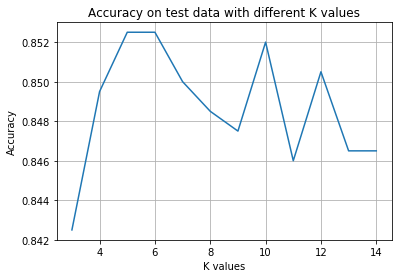

In [30]:
%matplotlib inline
plt.plot(Ks, scores)
plt.grid()
plt.title('Accuracy on test data with different K values')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.show()

### Try Visualization

In [17]:
X_train_pca.shape

(30000, 185)

<IPython.core.display.Javascript object>


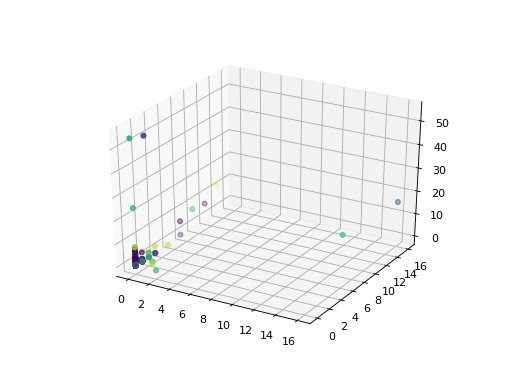

In [56]:
import matplotlib.pyplot as plt
import numpy as np

X = X_train
y = y_train.reshape(30000,)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
plt.show()

<IPython.core.display.Javascript object>


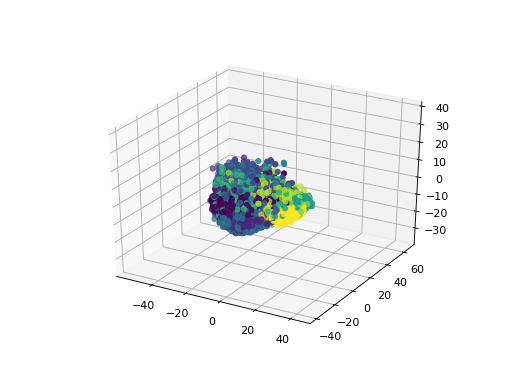

In [57]:
import matplotlib.pyplot as plt
import numpy as np

X = X_train
new_X = X_train_pca
y = y_train.reshape(30000,)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_X[:, 2], c=y)
plt.show()

### Try ROC curve

In [11]:
%%time
knn.fit(X_train_pca, y_train)

Wall time: 997 µs


KNN(k = 5)

In [12]:
X_predict = knn.predict(X_train_pca)

KeyboardInterrupt: 

In [ ]:
for x in X_train_pca:
    
    distances = [sqrt(np.sum((x_train - x)**2)) for x_train in X_train_pca]

In [ ]:
x = X_train_pca[0]
x

In [ ]:
distances = [sqrt(np.sum((x_train - x)**2)) for x_train in X_train_pca]
distances

In [ ]:
near_index = np.argsort(distances)
near_index

In [ ]:
count(near_index == 0) / 5 # possibility that belonging to class 0

In [ ]:
topK_y = [int(self.y_train[i]) for i in near_index[:self.k]]
topK_y

In [ ]:
votes = Counter(topK_y)
votes

In [7]:
y = y_test.reshape(2000,)
y.shape

(2000,)

In [ ]:
k = 5
threshold = 0.2
# now for class 0
y_


## Confusion Matrix

In [23]:
knn.fit(X_train_pca, y_train)

KNN(k = 5)

In [24]:
X_predict = knn.predict(X_test_pca)
y_test = y_test.reshape(2000,)

In [32]:
cm = np.zeros((10, 10), dtype='int')
for i in range(10): #prediction of each class，rows in the matrix
    for j in range(10): #real label of each class, columns in the matrix
        cm[j][i] = np.sum((X_predict==i) & (y_test == j))

In [33]:
cm # show Confusion Matrix

array([[147,   0,   3,   7,   1,   0,  20,   0,   0,   0],
       [  2, 185,   0,   2,   0,   0,   2,   0,   0,   0],
       [  2,   0, 169,   1,  19,   0,  19,   0,   0,   0],
       [  4,   0,   1, 172,   8,   0,   5,   0,   1,   0],
       [  1,   0,  17,   4, 169,   0,  20,   0,   1,   0],
       [  0,   0,   1,   0,   0, 181,   0,  15,   0,  17],
       [ 33,   0,  27,   6,  26,   0, 107,   0,   1,   0],
       [  0,   0,   0,   0,   0,   2,   0, 186,   0,  10],
       [  0,   0,   1,   2,   1,   0,   2,   1, 212,   0],
       [  1,   0,   0,   0,   0,   2,   1,   6,   0, 177]])

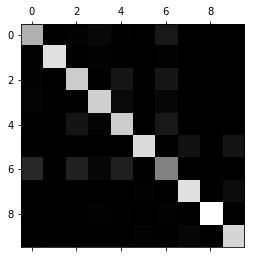

In [37]:
# visualization
import matplotlib.pyplot as plt
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()
#present in gray value, bigger values are brighter

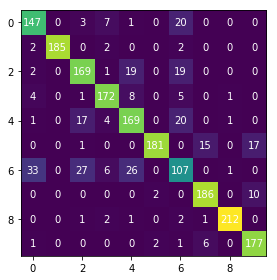

In [38]:
#another way to visulize with exact numbers
fig, ax = plt.subplots()
im = ax.imshow(cm)
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, cm[i][j], ha='center', va='center', color='w')
fig.tight_layout()
plt.show()

## Error rate Matrix

In [39]:
error_matrix = cm / np.sum(cm, axis=1)
np.fill_diagonal(error_matrix, 0)
#error_matrix: the bigger value means more wrong predictions

In [40]:
error_matrix

array([[0.        , 0.        , 0.01428571, 0.03664921, 0.00471698,
        0.        , 0.1       , 0.        , 0.        , 0.        ],
       [0.01123596, 0.        , 0.        , 0.0104712 , 0.        ,
        0.        , 0.01      , 0.        , 0.        , 0.        ],
       [0.01123596, 0.        , 0.        , 0.0052356 , 0.08962264,
        0.        , 0.095     , 0.        , 0.        , 0.        ],
       [0.02247191, 0.        , 0.0047619 , 0.        , 0.03773585,
        0.        , 0.025     , 0.        , 0.00456621, 0.        ],
       [0.00561798, 0.        , 0.08095238, 0.02094241, 0.        ,
        0.        , 0.1       , 0.        , 0.00456621, 0.        ],
       [0.        , 0.        , 0.0047619 , 0.        , 0.        ,
        0.        , 0.        , 0.07575758, 0.        , 0.09090909],
       [0.18539326, 0.        , 0.12857143, 0.03141361, 0.12264151,
        0.        , 0.        , 0.        , 0.00456621, 0.        ],
       [0.        , 0.        , 0.       

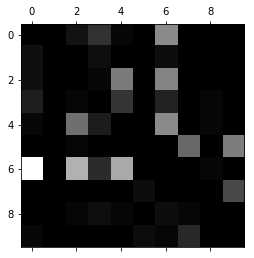

In [41]:
# visualization
import matplotlib.pyplot as plt
plt.matshow(error_matrix, cmap=plt.cm.gray)
plt.show()
#present in gray value, bigger values are brighter

#### So we can see that the 0th: 'T-shirt/top' were oftern wrongly predicted as the 6th: 'Shirt', while actually  they are similar